In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import numpy as np
import json

with open('total_transfer_experiment.json', 'r') as fp:
    data = json.load(fp)

# Results for imdb,uwcse

AUC ROC


/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


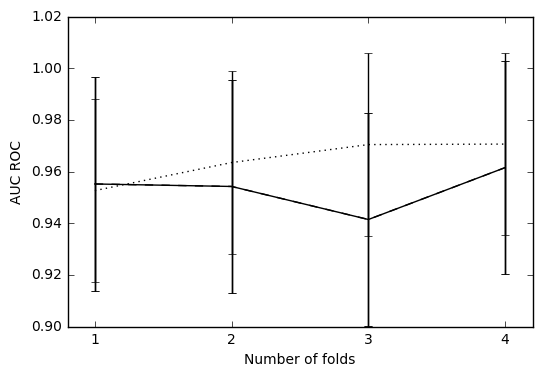

AUC PR


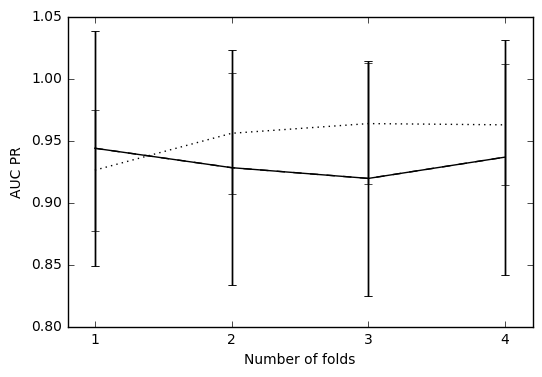

CLL


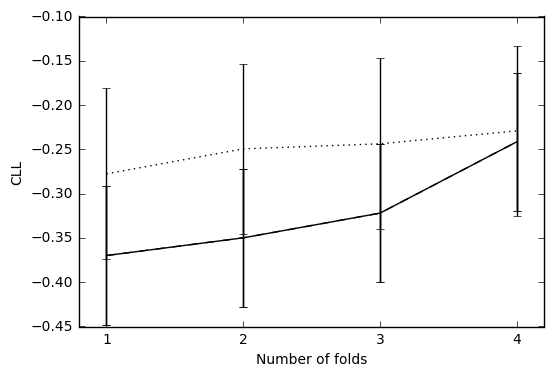

Recall


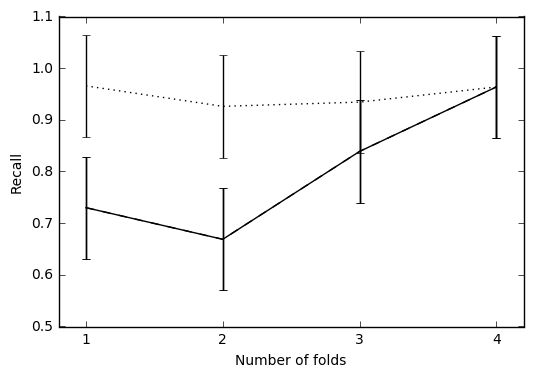

F1


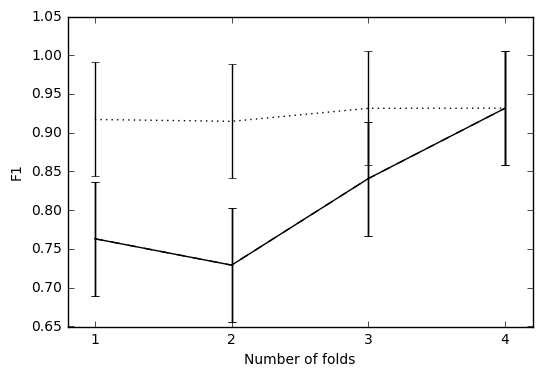

Precision


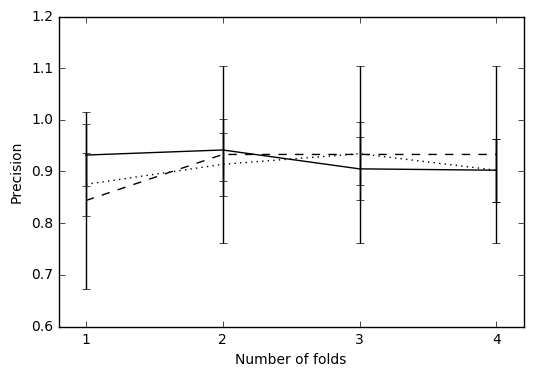

Learning and Revision time


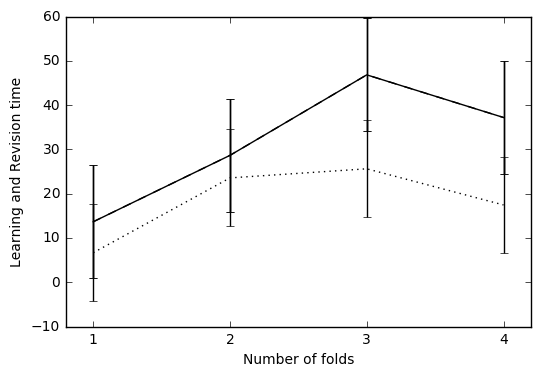

Inference time


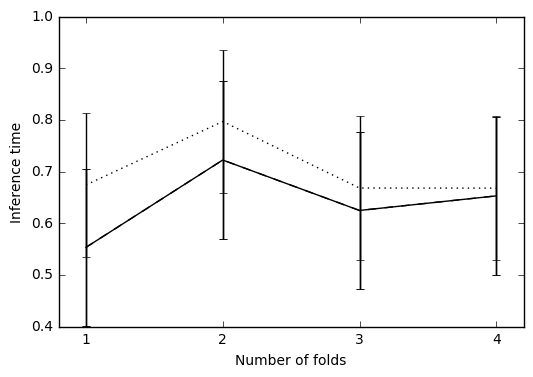

# Results for uwcse,imdb

AUC ROC


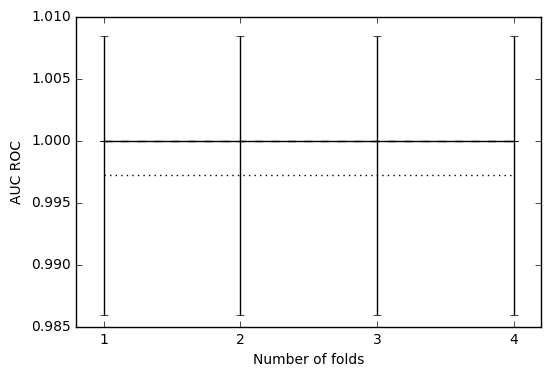

AUC PR


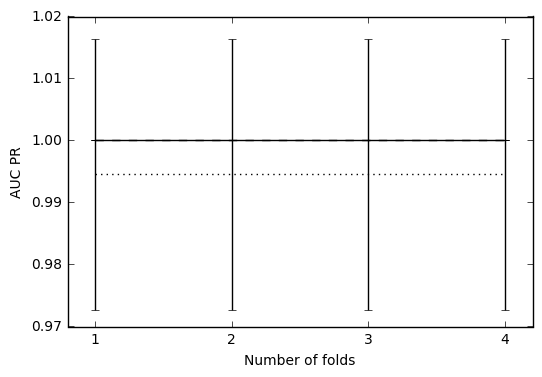

CLL


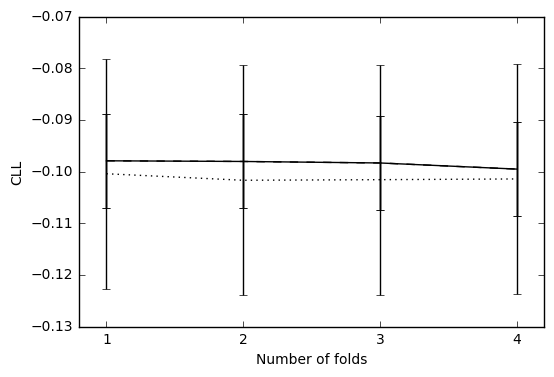

Recall


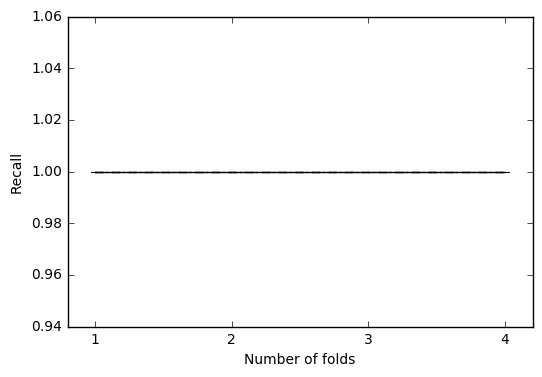

F1


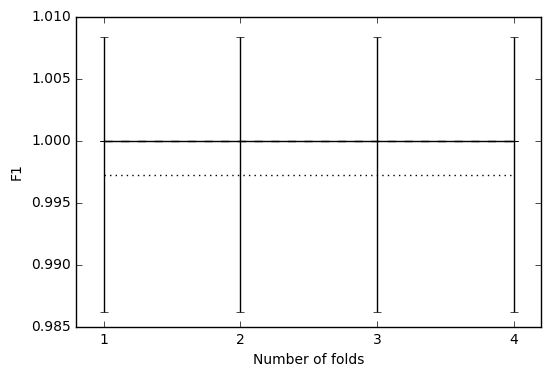

Precision


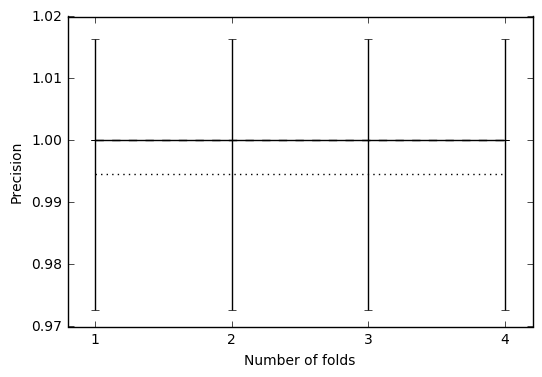

Learning and Revision time


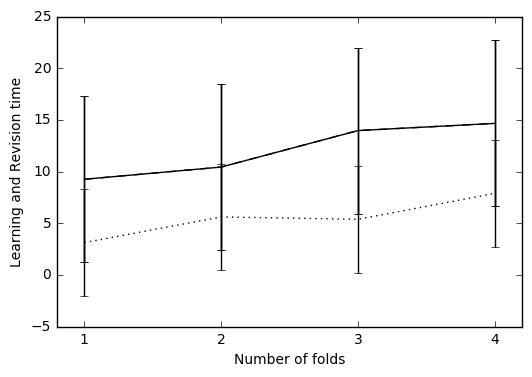

Inference time


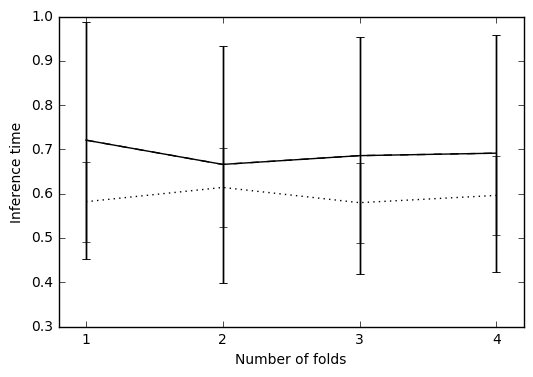

In [8]:
for dataset in ['imdb,uwcse','uwcse,imdb']:
    display(Markdown('# Results for ' + dataset))
    for metric in ['AUC ROC', 'AUC PR', 'CLL', 'Recall', 'F1', 'Precision', 'Learning and Revision time', 'Inference time']:
        x = []
        y_small = []
        y_revision = []
        y_parameter = []
        print(metric)
        for small_train_size in range(len(data['results'][dataset]['scratch'])):           
            if metric == 'Precision':
                small = np.array([result[metric][0] for result in data['results'][dataset]['scratch'][str(small_train_size)]])
                revision = np.array([result[metric][0] for result in data['results'][dataset]['transfer'][str(small_train_size)]])
                parameter = np.array([result['Parameter Learning Results'][metric][0] for result in data['results'][dataset]['transfer'][str(small_train_size)]])
            elif metric == 'Learning and Revision time':
                small = np.array([result['Learning time'] for result in data['results'][dataset]['scratch'][str(small_train_size)]])
                revision = np.array([result['Learning time'] for result in data['results'][dataset]['transfer'][str(small_train_size)]])
                parameter = np.array([result['Learning time'] for result in data['results'][dataset]['transfer'][str(small_train_size)]])
            else:
                small = np.array([result[metric] for result in data['results'][dataset]['scratch'][str(small_train_size)]])
                revision = np.array([result[metric] for result in data['results'][dataset]['transfer'][str(small_train_size)]])
                parameter = np.array([result[metric] for result in data['results'][dataset]['transfer'][str(small_train_size)]])

            #print('small: %s' % small)
            #print('revision: %s' %revision)
            small_mean = small.mean()
            small_error = 2 * small.std()
            revision_mean = revision.mean()
            revision_error = 2 * revision.std()
            parameter_mean = parameter.mean()
            parameter_error = 2 * parameter.std()
            x.append(small_train_size+1)
            y_small.append(small_mean)
            y_revision.append(revision_mean)
            y_parameter.append(parameter_mean)
        #plt.plot(x, y_small, linestyle=':', color='black')
        #plt.plot(x, y_revision, color='black')
        plt.errorbar(x, y_small, yerr=small_error, linestyle=':', color='black')
        plt.errorbar(x, y_revision, yerr=revision_error, color='black')
        plt.errorbar(x, y_parameter, yerr=parameter_error, linestyle='--', color='black')
        plt.xlim(0.8,4.2)
        plt.xlabel('Number of folds')
        plt.ylabel(metric)
        plt.legend(loc='upper left')
        ax = plt.gca()
        ax.set_xticks([1,2,3,4])
        plt.show()